# **Predictive Analysis of Bank Customer Churn in Python: Enhancing Retention Strategies through Machine Learning**

## 1. Introduction

In this analysis, we delve into the phenomenon of customer churn within a dataset of 10,127 bank customers.

Understanding churn is critical due to its significant impact on profitability, especially in industries like banking where customer retention is more cost-effective than acquisition. Our study focuses on:

- The Impact of Churn: Examining how churn affects a company's performance, particularly in subscription-based sectors.

- Churn Contributing Factors: Identifying key elements that lead to customer attrition, such as service quality and customer demographics.

- Predictive Modeling: Developing a model to predict which customers are likely to churn, aiding in strategic decision-making for better customer satisfaction and retention.



## 2. Objectives
The aim of this notebook is to thoroughly understand and accurately predict customer churn for a bank. Our approach includes:

- Exploratory Data Analysis (EDA): Initial analysis to identify and visualize key factors contributing to customer churn.
- Machine Learning Models for Prediction: Building models to predict if a customer will churn, utilizing the insights from EDA.

This task is framed as a classification problem, and the choice of performance metric for optimizing our models is critical. We have selected recall as the primary metric, prioritizing the correct identification of customers likely to churn, which is crucial for the bank.

###Skills and Techniques Involved:

- Exploratory Data Analysis
- Data Visualization
- Data Preprocessing: Including Feature Selection, Encoding Categorical Features, and Feature Scaling.
- Addressing Class Imbalance: Using techniques like SMOTE.

###Models to be Used:

- Logistic Regression
- Support Vector Machines
- Random Forests
- Gradient Boosting

##3. Data Dictionary

The dataset "BankChurners.csv" has the following dimensions:

- Number of Rows: 10,127
- Number of Columns: 23

Each row represents a customer's information, and the columns contain various attributes as described in the data dictionary.

- CLIENTNUM: A unique identifier for each client.
- Attrition_Flag: Indicates whether the customer left the bank or not.
- Customer_Age: Age of the customer.
- Gender: Gender of the customer.
- Dependent_count: Number of dependents.
- Education_Level: Educational background of the customer.
- Marital_Status: Marital status of the customer.
- Income_Category: Income bracket of the customer.
- Card_Category: Type of card (e.g., Blue, Gold, Platinum).
- Months_on_book: Length of relationship with the bank in months.
- Total_Relationship_Count: Total number of products held by the customer.
- Months_Inactive_12_mon: Number of months the account was inactive in the last 12 months.
- Contacts_Count_12_mon: Number of times the customer contacted the bank in the last 12 months.
- Credit_Limit: Credit limit on the customer’s credit card.
- Total_Revolving_Bal: Total revolving balance on the credit card.
- Avg_Open_To_Buy: Average open to buy credit line in the last 12 months.
- Total_Amt_Chng_Q4_Q1: Change in transaction amount from Q4 to Q1.
- Total_Trans_Amt: Total transaction amount in the last 12 months.
- Total_Trans_Ct: Total number of transactions in the last 12 months.
- Total_Ct_Chng_Q4_Q1: Change in transaction count from Q4 to Q1.
- Avg_Utilization_Ratio: Average card utilization ratio.
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: A score from a Naive Bayes Classifier related to attrition flag (specific interpretation may depend on model details).
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: A score from a Naive Bayes Classifier related to attrition flag (specific interpretation may depend on model details).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Data_Portfolio/BankChurners.csv'
import pandas as pd
data = pd.read_csv(path)

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 4. Exploratory Data Analysis and Preprocessing

In [4]:
# Exploratory Data Analysis and Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
numerical_summary = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Datatypes of the columns
data_types = data.dtypes

numerical_summary, missing_values, data_types

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

Text(0.5, 1.0, 'Distribution of Attrition Flag')

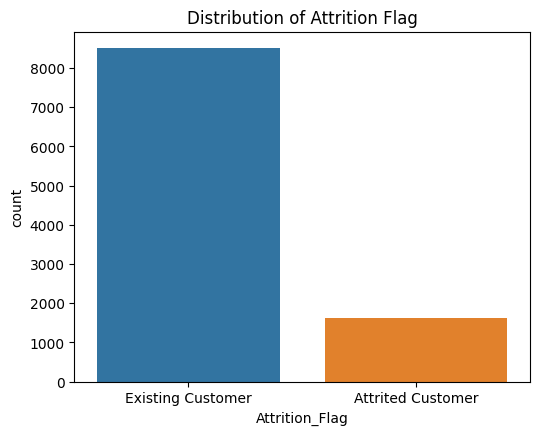

In [5]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 1: Attrition Flag Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Attrition_Flag', data=data)
plt.title('Distribution of Attrition Flag')

**Distribution of Attrition Flag**

- The majority of customers are existing customers, indicating a lower rate of churn.
- This imbalance in the dataset could impact the performance of predictive models focused on churn prediction.

Text(0.5, 1.0, 'Customer Age Distribution')

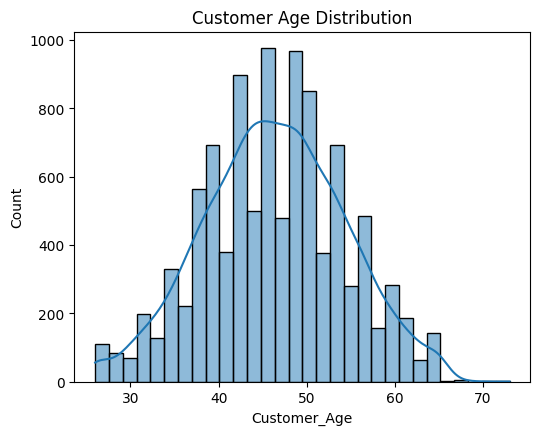

In [6]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 2: Customer Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(data['Customer_Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')

**Customer Age Distribution**

- The age of customers appears normally distributed, centered around the mid-40s.
- This suggests a mature customer base, which could influence the bank's product offerings and marketing strategies.

Text(0.5, 1.0, 'Gender Distribution')

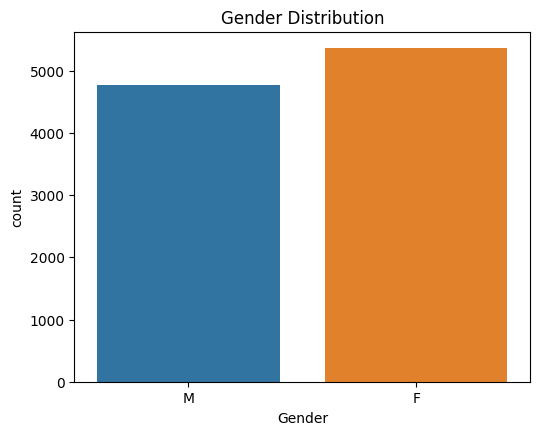

In [7]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 3: Gender Distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

**Gender Distribution**

- There is a relatively balanced distribution between male and female customers.
- This balance is beneficial for the bank as it suggests a diverse customer base.

Text(0.5, 1.0, 'Income Category Distribution')

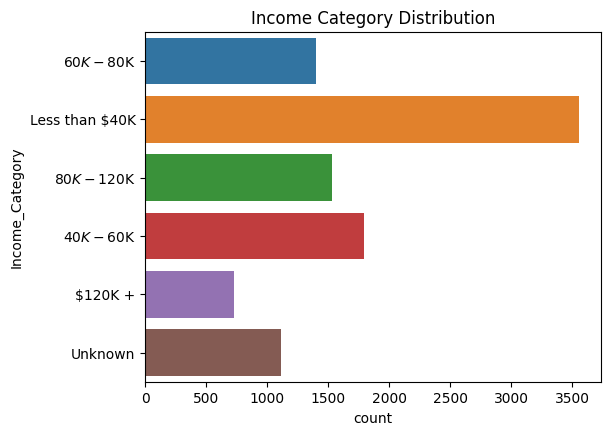

In [8]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 4: Income Category Distribution
plt.subplot(2, 3, 4)
sns.countplot(y='Income_Category', data=data)
plt.title('Income Category Distribution')


**Income Cate Distribution**

- A significant number of customers fall into the "Less than $40K" income category.
- The bank might be popular among lower to middle-income groups, or it could indicate a potential market segment for more tailored financial products.

Text(0.5, 1.0, 'Credit Limit Distribution')

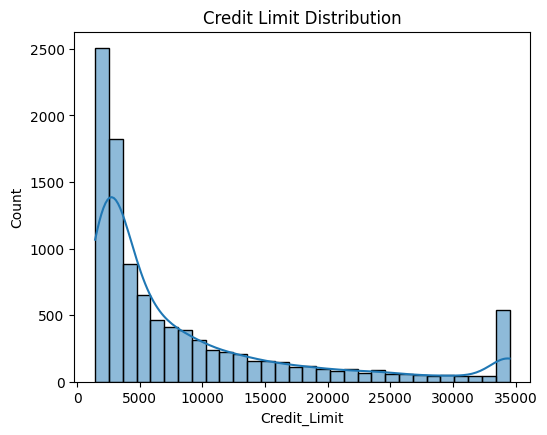

In [9]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 5: Credit Limit Distribution
plt.subplot(2, 3, 5)
sns.histplot(data['Credit_Limit'], bins=30, kde=True)
plt.title('Credit Limit Distribution')

**Credit Limit Distribution**

- The distribution of credit limits is right-skewed, with most customers having lower credit limits.
- The bank might be conservative in assigning high credit limits, or it could reflect the creditworthiness of the majority of its customers.

**Education Level**

- Dominant Education Levels: The most common education levels among the customers are "Graduate" and "High School". This suggests that a significant portion of the bank's customer base consists of individuals who have either completed a high school education or hold a graduate degree. The prominence of these two categories indicates that the bank successfully attracts a diverse range of customers in terms of educational background.

- Lesser Represented Groups: On the other end of the spectrum, the least represented education levels are "Doctorate" and "Post-Graduate". This could imply either a smaller pool of potential customers with these higher education levels or a lower penetration rate of the bank's services among these groups. The bank might need to explore targeted strategies to engage these segments more effectively or understand the reasons behind this lower representation.

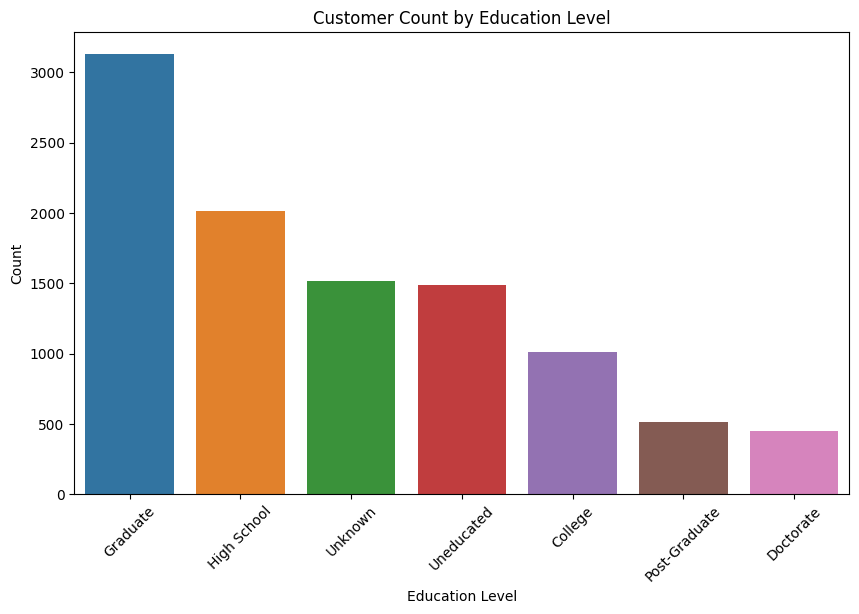

In [10]:
# EDA Graph Visualization: Count of Customers by Education Level

plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=data, order = data['Education_Level'].value_counts().index)
plt.title('Customer Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Credit Limit**

- Skewed Distribution: The distribution of credit limits is right-skewed, indicating that a larger number of customers have lower credit limits, while fewer customers have very high credit limits. This skewness suggests that the bank's credit allocation is conservative for the majority of its customers, potentially to manage risk.

- High Credit Limit Concentration: There is a noticeable concentration of customers at the higher end of the credit limit spectrum, though they are significantly fewer in number compared to those with lower limits. This could indicate a segment of customers who are likely more affluent or have a higher creditworthiness, to whom the bank offers substantially higher credit limits. This segment, while smaller, might represent a key customer base for the bank in terms of financial products and services.

### Key Findings:

**1. Customer Attrition:**

- The dataset shows a lower rate of customer attrition, with a larger proportion of existing customers.
- This suggests that the bank has been successful in retaining its customers, but it also emphasizes the need to focus on the factors leading to the smaller yet significant churn rate.

**2. Customer Demographics:**

- The age distribution is centered around mid-40s, indicating a mature customer base.
- This demographic might have specific financial needs such as retirement planning or mortgage management.
- The gender distribution is balanced, reflecting a diverse customer base.
Many customers fall into the lower income brackets.
- This demographic could be a key target for specific financial products tailored to their income levels.

**3. Financial Behaviors:**

- The credit limit distribution suggests that the bank's customer base primarily holds lower credit limits, which could reflect a cautious credit policy or the creditworthiness of the customers.
- The spending patterns and product usage (not deeply analyzed here but could be inferred from transaction amounts and counts) would further inform the bank about customer preferences and risk profiles.

**4. Educational Level:**

- A large proportion of customers have a graduate level of education, followed by high school graduates.
- Lesser representation of customers with post-graduate and doctorate degrees.

**5. Credit Limit**
- The distribution of credit limits is skewed towards the lower end, indicating cautious credit allocation for the majority of customers.
- A smaller customer segment has significantly higher credit limits, possibly reflecting a higher creditworthiness.


### Implications and Recommendations:

**1. Customer Retention Strategies:**

- Given the importance of retaining existing customers, the bank could invest in loyalty programs, personalized banking services, and targeted communication strategies.
- Analyze the reasons behind customer attrition and target those areas for improvement, such as customer service, product offerings, or value propositions.


**2. Product Development:**

- Tailoring financial products to suit the needs of the predominant age group and income level could help in better addressing customer needs.
- For example, offering more competitive rates on savings accounts or personal loans for lower-income groups.

**3. Risk Management:**

- Understanding the credit limit distribution helps in risk management.
- The bank might continue its cautious approach or explore ways to safely extend more credit to trustworthy customers.

**4. Marketing Initiatives:**

- Targeted marketing campaigns for different educational groups, recognizing the predominance of graduates and high school educated customers.
- Develop strategies to engage under-represented groups in higher education segments, potentially uncovering untapped market segments.

### Conclusion:

The EDA reveals valuable insights into customer attrition, demographics, financial behaviors, education levels, and credit limits. The diverse customer base presents opportunities for tailored financial services and products. Effective customer retention strategies, combined with prudent risk management and targeted marketing initiatives, can help in maintaining a healthy customer base and attracting new customers. The bank should leverage these insights to enhance customer satisfaction, reduce attrition rates, and drive sustainable growth.

Section 제목 필요

In [11]:
# Summary statistics for numerical columns
numerical_summary = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Datatypes of the columns
data_types = data.dtypes

numerical_summary, missing_values, data_types

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Convert 'Attrition_Flag' to binary values
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Recategorize 'Card_Category' into 'Blue' and 'NotBlue'
data['Card_Category'] = data['Card_Category'].apply(lambda x: 'Blue' if x == 'Blue' else 'NotBlue')

# Split the dataset into train and test sets using stratified sampling
X = data.drop(['Attrition_Flag', 'CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)  # Removing 'CLIENTNUM'
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply standard scaling to numeric variables
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Convert categorical variables to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure the same columns in both sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test.fillna(0, inplace=True)

# Train a logistic regression model with LASSO for feature selection
lasso = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000)
selector = SelectFromModel(lasso).fit(X_train, y_train)
selected_features = X_train.columns[(selector.get_support())]

# Fit the model using selected features
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features], y_train)

selected_features.tolist()

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_M',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Unknown',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_NotBlue']

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Dropping the specified features from the data
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                  'CLIENTNUM'], axis=1)

# Updating X_train and X_test to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize models
models = {
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Training models and evaluating
model_results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_results[name] = {
        "Model": model,
        "Accuracy": accuracy,
        "Report": report
    }

# Displaying results
model_results_summary = {name: {"Accuracy": result["Accuracy"]} for name, result in model_results.items()}
model_results_summary



{'Lasso Logistic Regression': {'Accuracy': 0.8993089832181639},
 'Decision Tree': {'Accuracy': 0.935176044751563},
 'Random Forest': {'Accuracy': 0.9529450477130635},
 'SVM': {'Accuracy': 0.9325435998683778},
 'KNN': {'Accuracy': 0.910167818361303}}

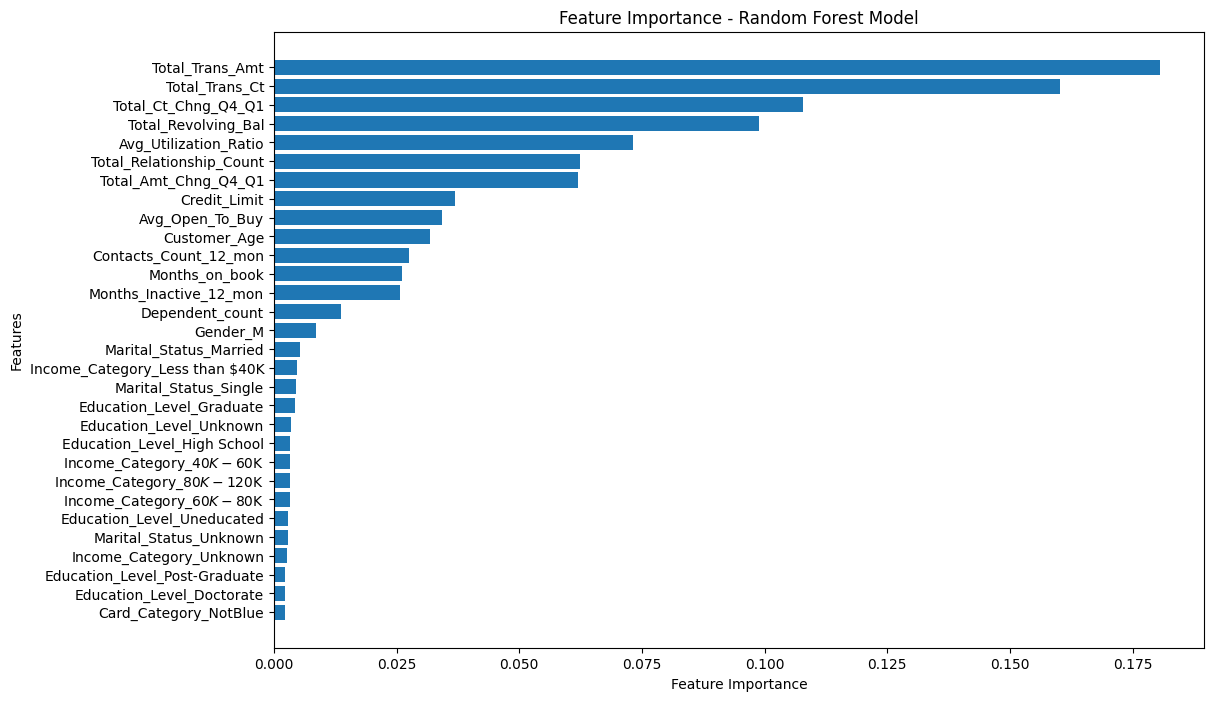

In [16]:
# Random Forest feature importance
rf_model = model_results_updated["Random Forest"]["Model"]
feature_importance = rf_model.feature_importances_

# Creating a bar plot for feature importance
plt.figure(figsize=(12, 8))
sorted_idx = feature_importance.argsort()
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest Model')
plt.show()

Clientnum 삭제 필요. from trainset and testset.

Clientnum train set / test set 없애야 함

그래프에 대한 Insight를 보여줘야 한다.

- 그래프 2개의 주요 변수 바뀌지 않았다라는 것을 설명해야 함.
- 방법론이 바뀌어도, 중요한 변수는 변함이 없다.

변수들 음/양 상관관계

total/ tran ct 왜 -2 넘는지 설명

co-efficient가 왜 2인지 간단한 인사이트 주자.



- The Random Forest model shows the highest accuracy.
- The Decision Tree and SVM models also demonstrate high accuracy, though slightly lower than the Random Forest.
- The LASSO Logistic Regression and K-NN models have comparatively lower accuracy, but still perform well.

High Performance of Decision Tree and Random Forest:

1. The Decision Tree and Random Forest models showed the highest accuracy percentages among the models tested. This indicates that these models were particularly effective at classifying customers into 'Attrited' and 'Existing' categories in this specific dataset.
Random Forest's Superiority:

2. The Random Forest, an ensemble method that combines multiple decision trees, generally provided a more robust prediction than a single Decision Tree. This is often due to its ability to reduce overfitting, making the model more generalizable to new, unseen data.
Insights for Business Application:

3. The success of the Decision Tree and Random Forest models suggests that the features in your dataset have strong predictive power and clear decision boundaries, which these models can exploit effectively.
The feature importance plots from these models can be used to identify key factors influencing customer churn. This information is valuable for developing targeted customer retention strategies or improving services.


Accuracy / Recall / Precision

표로 적어줘야 한다.

